In [1]:
library(RSocrata)
water <- read.socrata("https://opendata.utah.gov/resource/j4aa-ce7s.csv")

water <- water[grep("[0-9]{4}", water$YEAR),]
water <- water[!is.na(water$CONSUMPTION),]
water[,1:4] <- lapply(water[,1:4], as.factor)
water[,5:6] <- lapply(water[,5:6], as.numeric)

sapply(water, class)

##        YEAR       MONTH       TRACT        TYPE CONSUMPTION CONNECTIONS 
##    "factor"    "factor"    "factor"    "factor"   "numeric"   "numeric"
dim(water)

Warning message:
“package ‘RSocrata’ was built under R version 3.4.4”

YEAR       MONTH       TRACT        TYPE CONSUMPTION CONNECTIONS 
   "factor"    "factor"    "factor"    "factor"   "numeric"   "numeric"

[1] 2724    6

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”

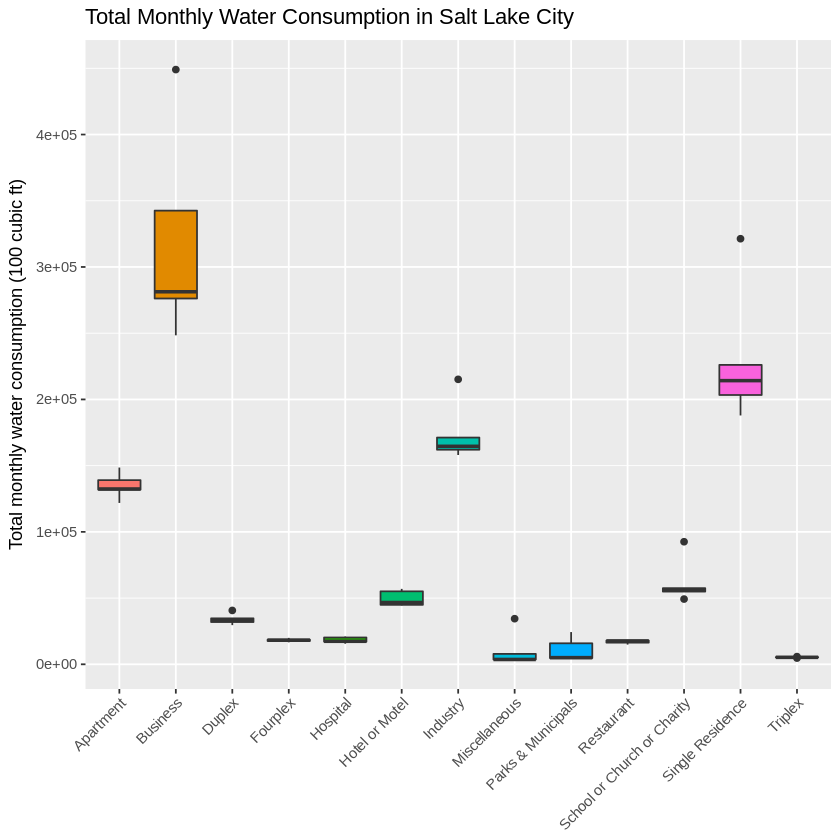

In [2]:
library(dplyr)
monthtype <- water %>% group_by(MONTH, YEAR, TYPE) %>% 
        summarize(consumption = sum(CONSUMPTION))

library(ggplot2)
ggplot(monthtype, aes(x = TYPE, y = consumption, fill = TYPE)) +
        geom_boxplot() + 
        theme(legend.position="none", axis.title.x = element_blank(), 
              axis.text.x= element_text(angle=45, hjust = 1)) +
        ggtitle("Total Monthly Water Consumption in Salt Lake City") +
        ylab("Total monthly water consumption (100 cubic ft)")

Warning message:
“package ‘lubridate’ was built under R version 3.4.4”
Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



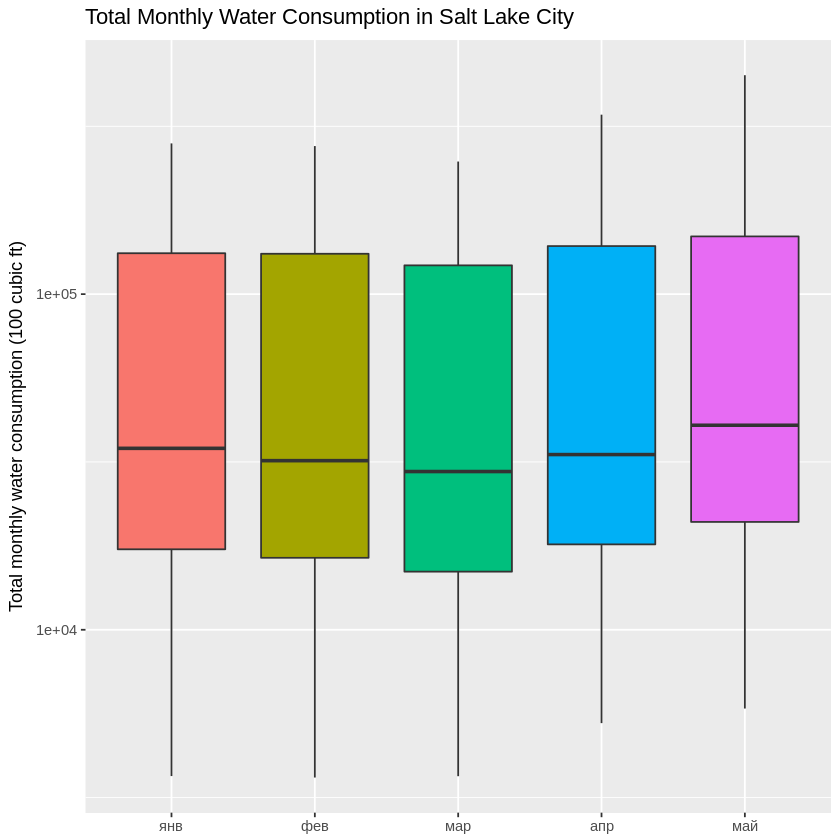

In [3]:
library(lubridate)
ggplot(monthtype, aes(x = month(as.integer(MONTH), label = TRUE), y = consumption, fill = MONTH)) +
        geom_boxplot() + scale_y_log10() +
        theme(legend.position="none", axis.title.x = element_blank()) +
        ggtitle("Total Monthly Water Consumption in Salt Lake City") +
        ylab("Total monthly water consumption (100 cubic ft)")

Warning message:
“package ‘ggfortify’ was built under R version 3.4.4”

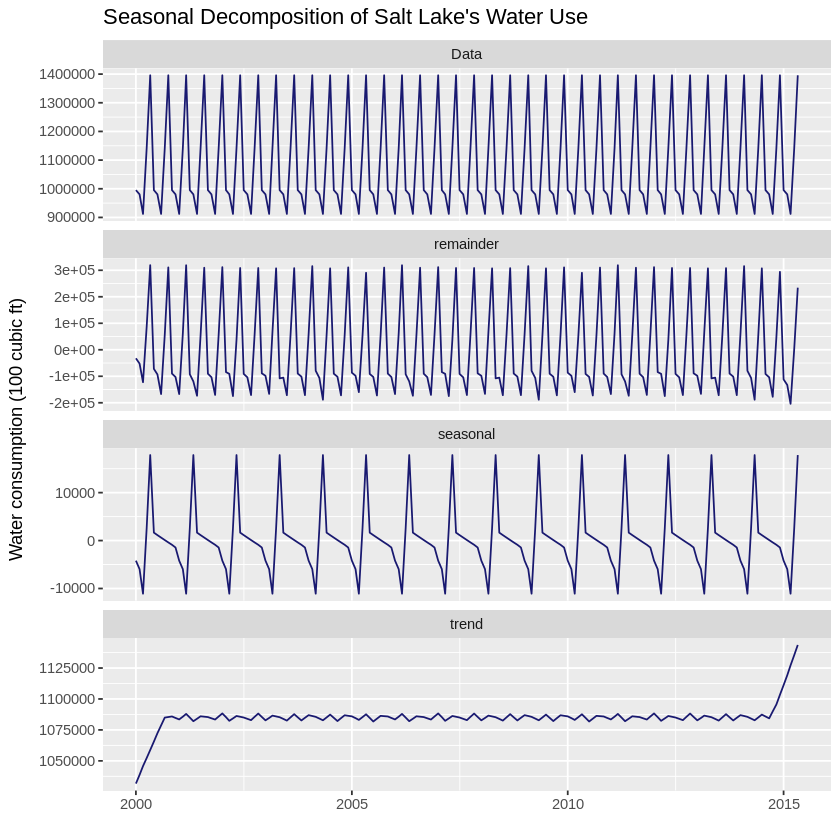

In [4]:
watertimeseries <- water %>% group_by(YEAR, MONTH) %>% summarize(consumption = sum(CONSUMPTION))
myTS <- ts(watertimeseries$consumption, start=c(2000, 1), end=c(2015, 5), frequency=12)

library(ggfortify)
autoplot(stl(myTS, s.window = 'periodic'), ts.colour = 'midnightblue') +
        ylab("Water consumption (100 cubic ft)") +
        ggtitle("Seasonal Decomposition of Salt Lake's Water Use")

Warning message:
“package ‘forecast’ was built under R version 3.4.4”

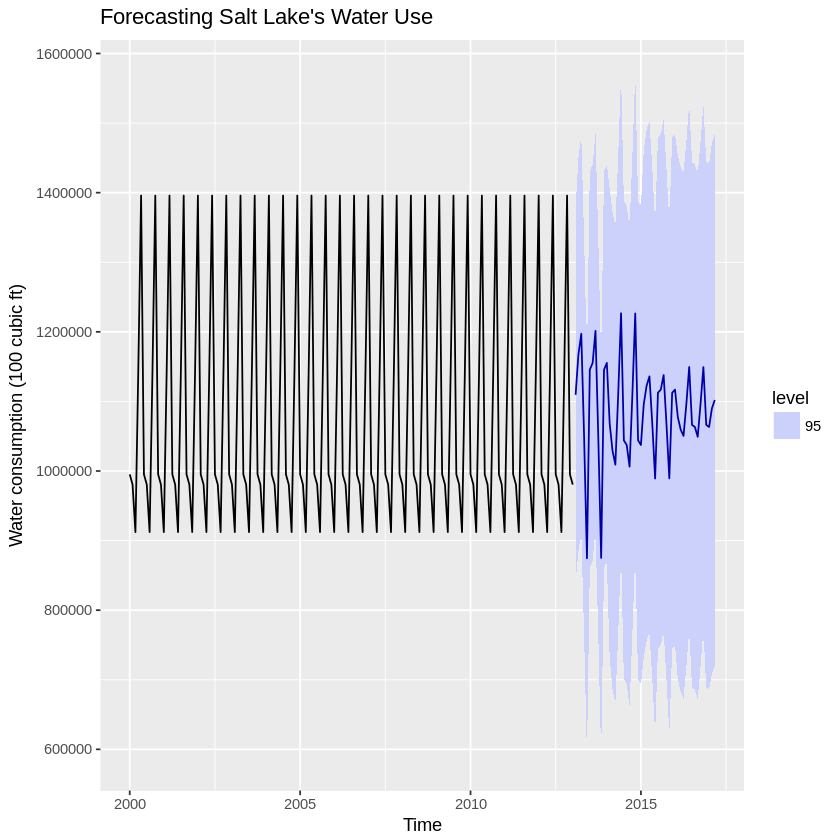

In [5]:
library(forecast)
myTS2013 <- window(myTS, start=c(2000, 1), end=c(2013, 1))
myArima <- auto.arima(myTS2013)
myForecast <- forecast(myArima, level = c(95), h = 50)
autoplot(myForecast, predict.colour = 'maroon') + 
        ylab("Water consumption (100 cubic ft)") +
        ggtitle("Forecasting Salt Lake's Water Use")